In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import style 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

### Importing the data


In [43]:
LoanData_df = pd.read_csv("loan.csv", low_memory=False)

### view imported data

In [44]:
LoanData_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Sanity checks

In [45]:
LoanData_df.shape

(39717, 111)

In [46]:
LoanData_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

### Calculate missing values percentage and delete columns

In [47]:
temp=(100*LoanData_df.isnull().sum()/LoanData_df.shape[0]).reset_index().rename(columns={"index":"column_name",0:"% missing"})
dropping_cols =temp[temp["% missing"]>=50]["column_name"]

LoanData_df=LoanData_df.drop(dropping_cols,axis=1)
LoanData_df
LoanData_df.shape

(39717, 54)

### Finding Unique Values and deleting non-unique columns

In [48]:
LoanData_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [49]:
LoanData_df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','initial_list_status','collections_12_mths_ex_med','pymnt_plan'],axis=1,inplace=True)
                        

In [50]:
LoanData_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [51]:
LoanData_df.shape

(39717, 45)

In [52]:
#Deleting the columns identoified above as unneeded for the analysis
drop_more_columns= ['funded_amnt','funded_amnt_inv','desc','title','zip_code','out_prncp_inv','total_pymnt_inv','collection_recovery_fee','last_credit_pull_d']
LoanData_df=LoanData_df.drop(drop_more_columns, axis=1)

In [53]:
LoanData_df.shape

(39717, 36)

In [54]:
# Data cleaning
# Lets remove % symbol from intrest rate column 
LoanData_df['int_rate'] = LoanData_df['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column 
LoanData_df['revol_util'] = LoanData_df['revol_util'].str.rstrip('%')

# format employment length column to have only numbers.

LoanData_df.emp_length.fillna('0',inplace=True)
LoanData_df['emp_length']=LoanData_df.emp_length.str.extract('(\d+)')
LoanData_df.head(2)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,5863.155187,5000.00,863.16,0.0,0.00,Jan-15,171.62,0.0
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,1008.710000,456.46,435.17,0.0,117.08,Apr-13,119.66,0.0


In [55]:
LoanData_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,Jan-15,171.62,0.0
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,1008.710000,456.46,435.17,0.00,117.08,Apr-13,119.66,0.0
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,Jun-14,649.91,0.0
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,Jan-15,357.48,0.0
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,May-16,67.79,0.0


# Data Correction

### Removing strings/characters from emp_length

In [ ]:
cleanData['emp_length'] = cleanData['emp_length'].replace({'< 1':'0.5'},regex=True)
cleanData['emp_length'] = cleanData['emp_length'].replace({'year':''},regex=True)
cleanData['emp_length'] = cleanData['emp_length'].replace({'s':''},regex=True)

### changing 'NONE' entry in 'home_ownership' with 'OTHER'

In [ ]:
cleanData['home_ownership'] = cleanData['home_ownership'].replace({'NONE':'OTHER'},regex=True)

### Replacing Blank employer name value with Unknown

In [ ]:
cleanData['emp_title'] = cleanData['emp_title'].replace(np.nan, 'Unknown')

### Replacing NAN value with 0 bankrupcties

In [ ]:
cleanData['pub_rec_bankruptcies'] = cleanData['pub_rec_bankruptcies'].replace(np.nan, 0)

### Removing non number charactors from revol_util columns and change to int type

In [ ]:
cleanData['revol_util'] = cleanData['revol_util'].replace({'%':''},regex=True)

# Data Imbalance

### The loan status column is the target variable for the model, so it's important to understand its distribution.



In [56]:
100*LoanData_df["loan_status"].value_counts(normalize=True)



# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off


Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

# Univariate Analysis


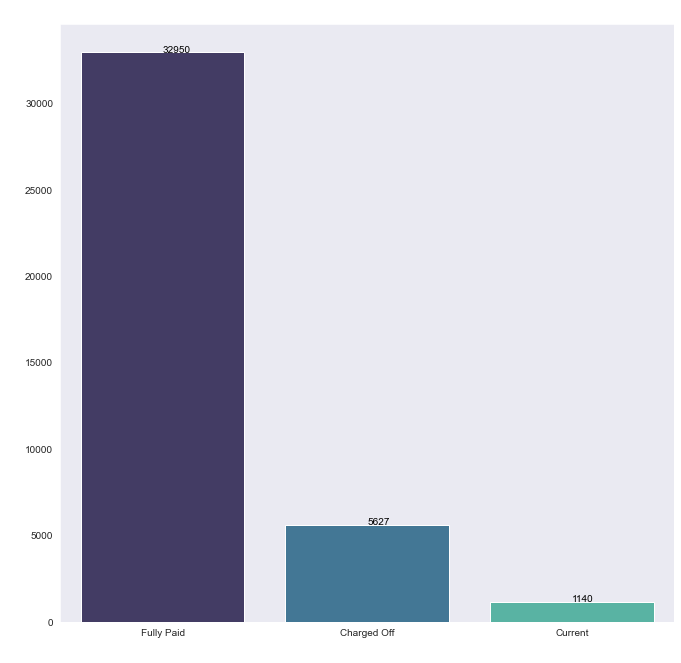

In [66]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(11,11))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=LoanData_df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=LoanData_df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

In [67]:
(LoanData_df.purpose.value_counts()*100)/len(LoanData_df)


# Most of the loans taken for debt consolidation(46.9%) and Credit card bill payment

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

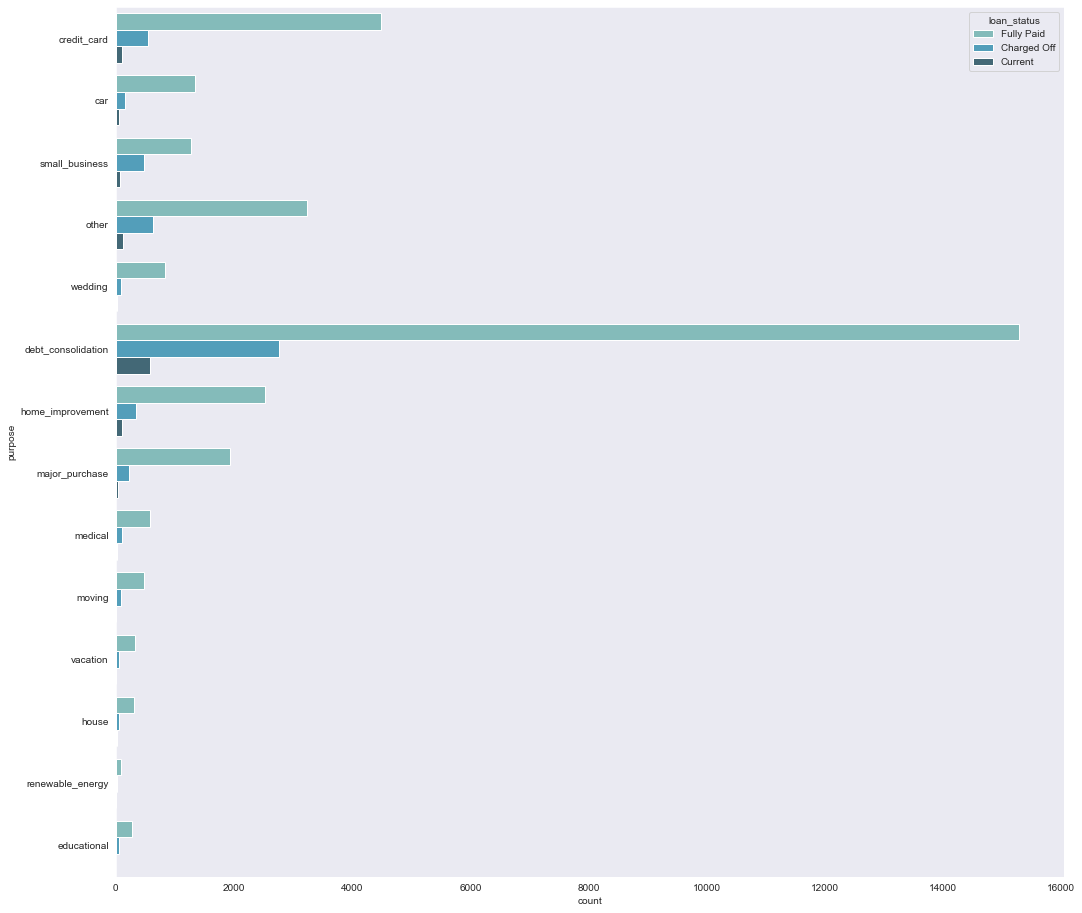

In [101]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(17,16))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=LoanData_df,hue='loan_status',palette='GnBu_d')     
plt.show()

# Segmented UniVariate Analysis

In [71]:
df_0 = LoanData_df[LoanData_df["loan_status"]=="Fully Paid"]
df_1 = LoanData_df[LoanData_df["loan_status"]=="Charged Off"]
df_2 = LoanData_df[LoanData_df["loan_status"]=="Current"]

In [72]:
df_0.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,5863.155187,5000.00,863.16,0.00,0.0,Jan-15,171.62,0.0
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,3005.666844,2400.00,605.67,0.00,0.0,Jun-14,649.91,0.0
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,12231.890000,10000.00,2214.92,16.97,0.0,Jan-15,357.48,0.0
5,1075269,1311441,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,5632.210000,5000.00,632.21,0.00,0.0,Jan-15,161.03,0.0
6,1069639,1304742,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60,11,0.0,10110.840000,6985.61,3125.23,0.00,0.0,May-16,1313.76,0.0


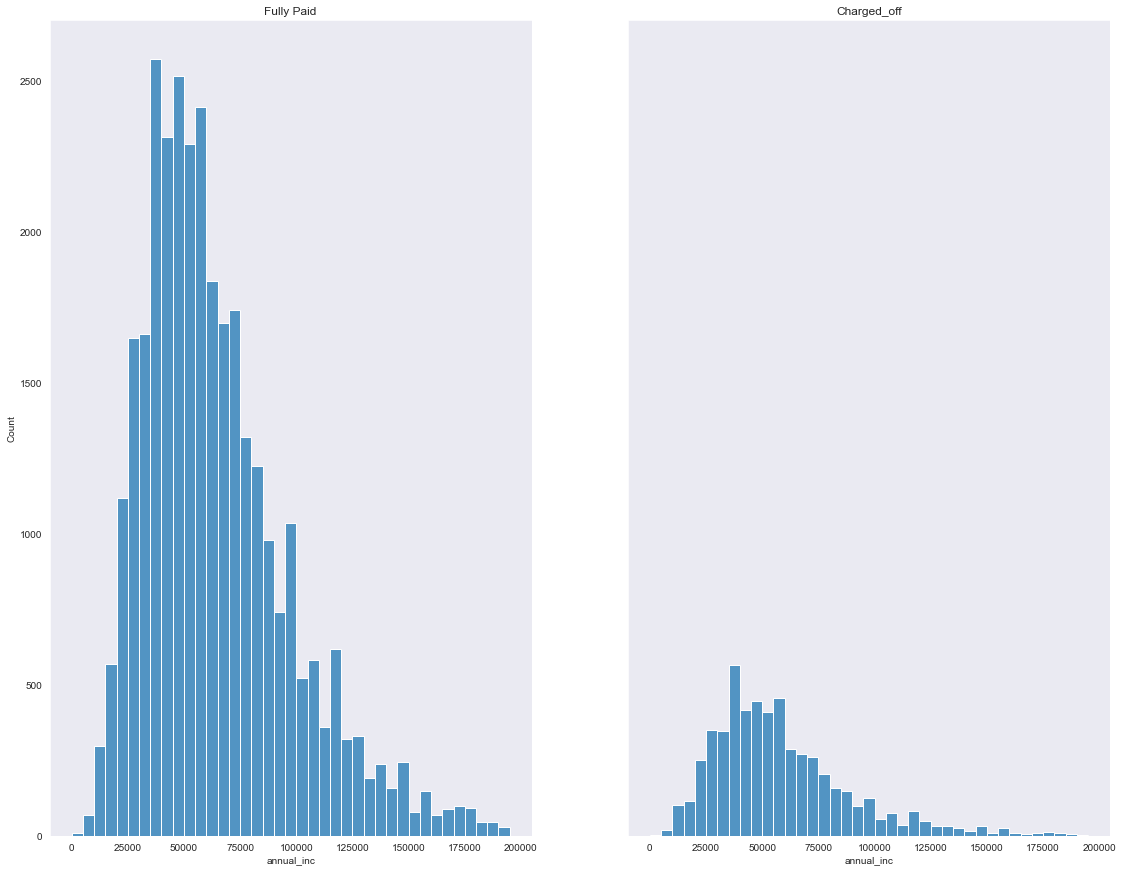

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(19, 15), sharey=True)


bins= [i for i in range(1,200000,5000)]
sns.histplot(ax=axes[0], x=df_0["annual_inc"],bins=bins).set_title('Fully Paid')



bins= [i for i in range(1,200000,5000)]
sns.histplot(ax=axes[1], x=df_1["annual_inc"],bins=bins).set_title('Charged_off')


plt.show()


### Insights
### By the above plots we analyse that customers with annual income range between 25000 to 125000 fully paid the loan

# Univariate analysis and  OUTLIERS

In [70]:
col_stats=LoanData_df['annual_inc'].describe()
col_stats

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [73]:
mean = col_stats['mean']
std = col_stats['std']
q1 = col_stats['25%']
q3 = col_stats['75%']

# Calculate z-scores for each data point in the column
z_scores = (LoanData_df["annual_inc"] - mean) / std

# Identify potential outliers using z-scores
outliers_z = LoanData_df[z_scores.abs() > 3]
print(outliers_z)

            id  loan_amnt        term int_rate  installment grade sub_grade  \
392    1064548       5000   36 months    6.62%       153.52     A        A2   
1348   1049941      35000   36 months    7.90%      1095.16     A        A4   
1463   1050329      30000   60 months   20.30%       799.84     E        E5   
1617   1048214      10000   36 months   15.96%       351.38     C        C5   
1620   1048026       7800   36 months   13.49%       264.66     C        C1   
1805   1043408      35000   36 months   10.65%      1140.07     B        B2   
1808   1045841      35000   60 months   14.27%       819.30     C        C2   
1836   1045409      35000   60 months   17.27%       874.93     D        D3   
2138   1040309      12000   36 months    7.51%       373.33     A        A3   
2364   1036932      10000   36 months   14.27%       343.09     C        C2   
2781   1013587      15000   60 months   18.25%       382.95     D        D5   
2923   1029488      35000   36 months    8.90%      

<AxesSubplot:xlabel='annual_inc'>

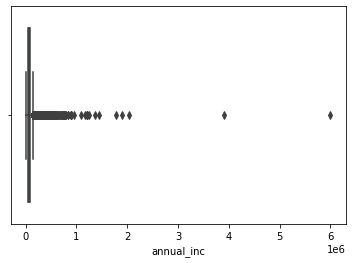

In [56]:
sns.boxplot(LoanData_df['annual_inc'])


#indincating the presence of outliers.

In [79]:
quantile_info = LoanData_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

### Let's see the quantile details.
### The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
### So, considering threshold for removing outliers as 0.95

In [81]:
annual_inc_new = LoanData_df['annual_inc'].quantile(0.95)
LoanData_df = LoanData_df[LoanData_df.annual_inc <= annual_inc_new]


#considering threshold for removing outliers as 0.95

<AxesSubplot:xlabel='annual_inc'>

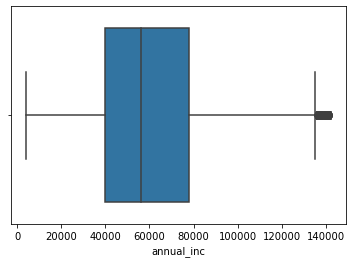

In [82]:
sns.boxplot(LoanData_df['annual_inc'])

In [83]:
LoanData_df['loan_amnt'].describe()

count    37743.000000
mean     10847.490925
std       7156.268085
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

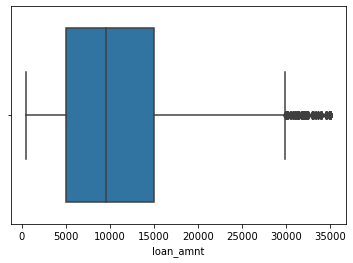

In [84]:
sns.boxplot(LoanData_df.loan_amnt)

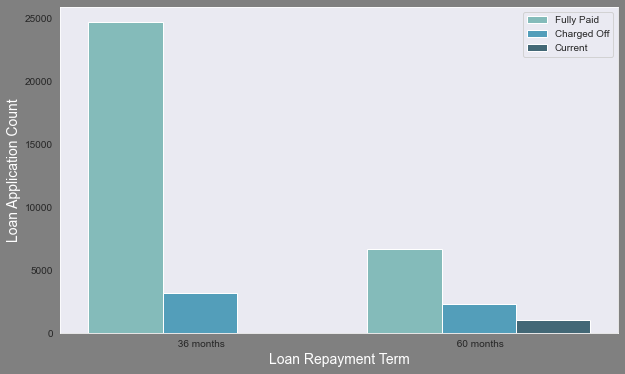

In [105]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='grey')
ax = sns.countplot(x="term",data=LoanData_df,hue='loan_status',palette='GnBu_d')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

# Bivariate Analysis

### Analysis on purpose vs chargedoff_portion

In [118]:
purpose_loan = LoanData_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan['Total'] = purpose_loan['Charged Off'] + purpose_loan['Current'] + purpose_loan['Fully Paid'] 
purpose_loan['Chargedoff_portion'] = purpose_loan['Charged Off'] / purpose_loan['Total']
purpose_loan.sort_values('Chargedoff_portion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_portion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


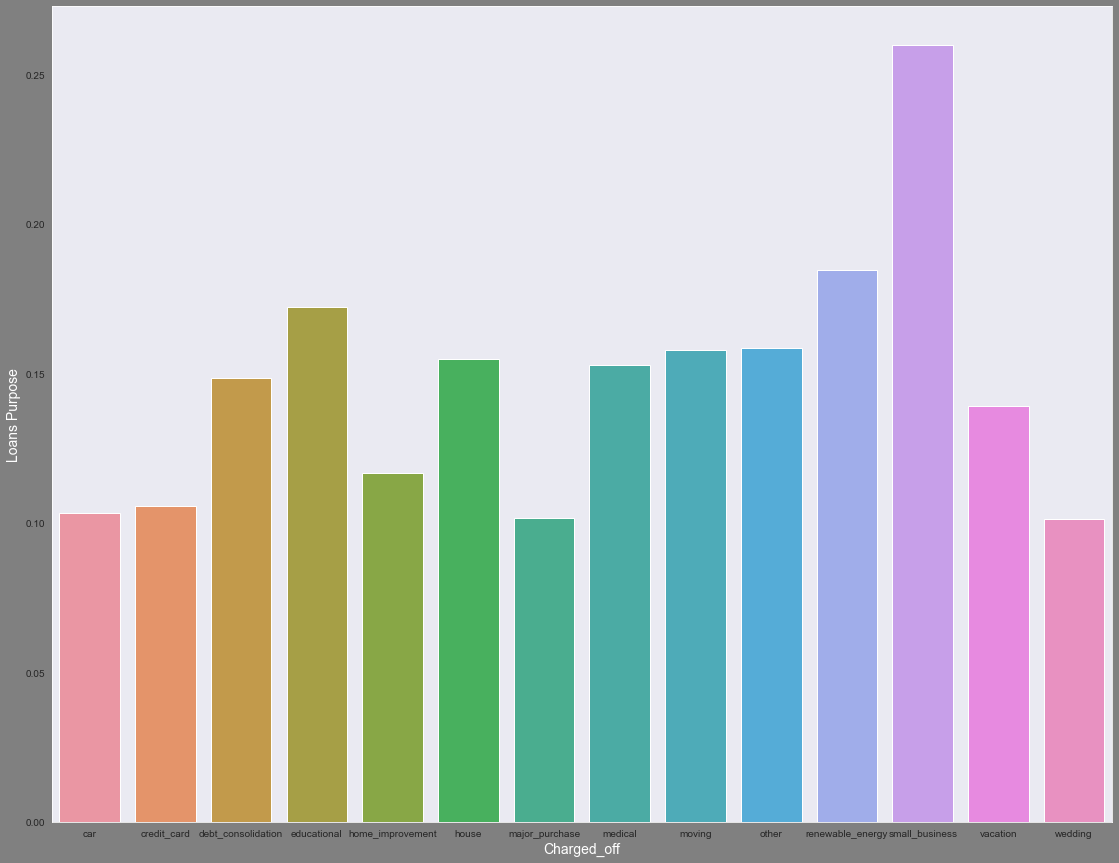

In [119]:
fig, ax1 = plt.subplots(figsize=(19, 15),facecolor='grey')
ax1=sns.barplot(x='purpose', y='Chargedoff_portion', data=purpose_loan)
ax1.set_ylabel('Loans Purpose',fontsize=14,color='w')
ax1.set_xlabel('Charged_off',fontsize=14,color = 'w')
plt.show()



### Insights:
### Small Business applicants have high chances of getting charged off.
### renewable_energy where chanrged off proportion is better as compare to other categories.

###   Analysis on grade vs Chargedoff_portion

In [120]:
grade_vs_loan = LoanData_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_portion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_portion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_portion
6,G,101,17,198,316,0.319620
5,F,319,73,657,1049,0.304099
4,E,715,179,1948,2842,0.251583
3,D,1118,222,3967,5307,0.210665
2,C,1347,264,6487,8098,0.166337
1,B,1425,345,10250,12020,0.118552
0,A,602,40,9443,10085,0.059693


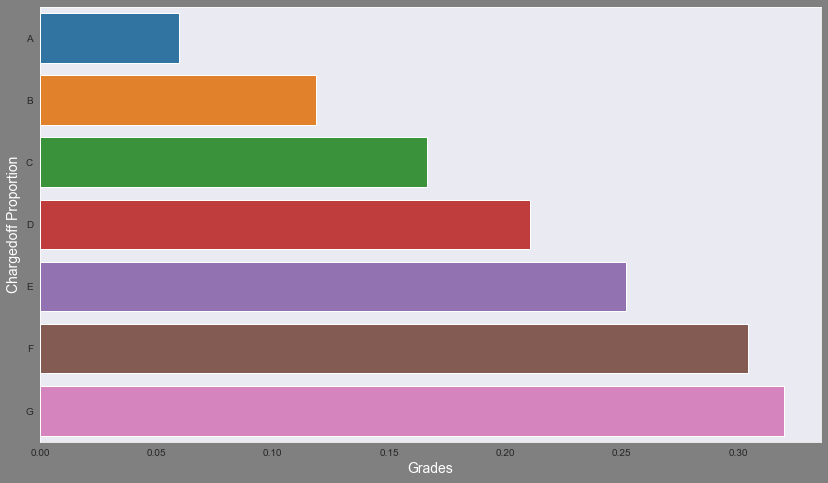

In [122]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='grey')
ax1=sns.barplot(y='grade', x='Chargedoff_portion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

### Insights:
### Grade "A" has very less chances of charged off.
### Grade "F" and "G" have very high chances of charged off.
### Chances of charged off is increasing with grade moving from "A" towards "G"

### Analysis on pub_rec_bankruptcies vs Chargedoff_Proportion

In [ ]:
bankruptcies_vs_loan = LoanData_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='grey')
ax1=sns.barplot(y='pub_rec_bankruptcies', x='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy',fontsize=14,color='r')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


### Insights:
### Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
### pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant 

### Bivariate Analysis on Recoveries vs Annual income

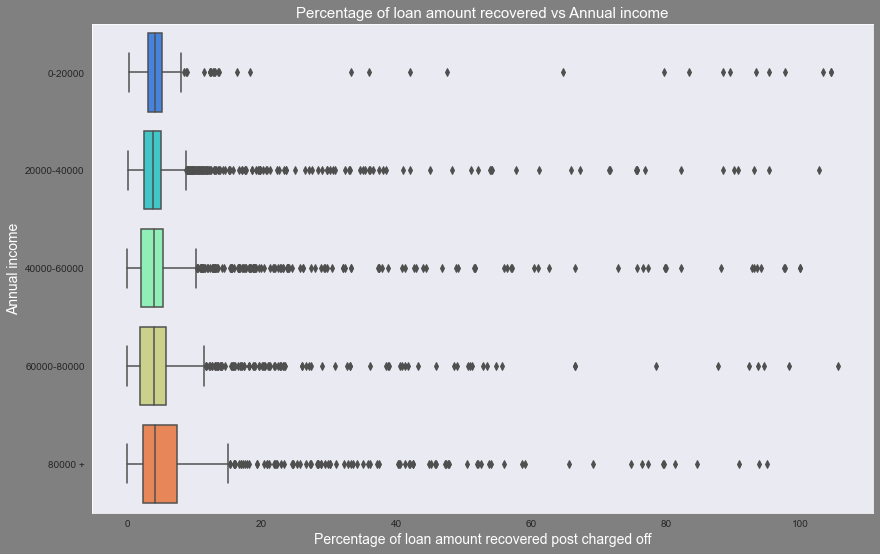

In [132]:

LoanData_df['annual_inc_cats'] = pd.cut(LoanData_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])



LoanData_df['recoveries']=pd.to_numeric(LoanData_df['recoveries'],errors='coerce')
loan_df_rec=LoanData_df[LoanData_df['recoveries'] > 0.00] 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

plt.figure(figsize=(14,9),facecolor='grey')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()



###  Insights:
### Higher percentage of loan amount is recovered when annual income is high.
### Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.